In [22]:
from copy import deepcopy
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np

In [30]:
max_viruses = 10
sizeX = 20 
omega = 1.5
tol = 0.03
sizeC = (sizeX,sizeX)
C = np.ones(sizeC)
dir = [(-1, 0), (0, -1), (0, 1), (1, 0)]
viruses = [(int(sizeX/2),int(sizeX/2))]
# viruses = [sizeX-1,int(sizeX/2)]

for i in range(sizeX):
  for j in range(sizeX):
    C[i][j] = round(1-(abs(sizeX/2-i) + abs(sizeX/2-j))/sizeX,2)

C2 = deepcopy(C)

In [32]:


def checkNeg(x):
  return True if x < 0 else False;

while len(viruses) < max_viruses and len(viruses) < pow(sizeX,2):
  while True:
    max_tol = 0
    for eoo in range(2):
      for i in range(sizeX):
        if i == 0 or i == sizeX-1:
          continue
        for j in range(sizeX):
          if(i+j) % 2 == eoo:
            continue
          if(i,j) in viruses:
            C[i][j] = 0
            continue
          if i == 0 and j == sizeX-1:
            C[i][j] = (omega/4) * (C[i+1][j] + C[i][j+1] + C[i][sizeX-1] + C[sizeX-1][j]) + (1-omega) * C[i][j]
            if checkNeg(C[i][j]) == True :
              C[i][j] = 0
          elif i == 0 and j == 0:
            C[i][j] = (omega/4) * (C[i+1][j] + C[i][0] + C[sizeX-1][j]+C[i][j-1]) + (1-omega) * C[i][j]
            if checkNeg(C[i][j]) == True :
              C[i][j] = 0
          elif i == 0:
            C[i][j] = (omega/4) * (C[i+1][j] + C[i][j+1] + C[sizeX-1][j]+C[i][j-1]) + (1-omega) * C[i][j]
            if checkNeg(C[i][j]) == True :
              C[i][j] = 0
          elif i == sizeX-1 and j == sizeX-1:
            C[i][j] = (omega/4) * (C[0][j] + C[i][0] + C[i-1][j] + C[i][j-1]) + (1 - omega) * C[i][j]
            if checkNeg(C[i][j]) == True :
              C[i][j] = 0
          elif i == sizeX-1 and j == 0:
            C[i][j] = (omega/4) * (C[0][j] + C[i][j+1] + C[i-1][j] + C[i][sizeX-1]) + (1 - omega) * C[i][j]
            if checkNeg(C[i][j]) == True :
              C[i][j] = 0
          elif i == sizeX -1 :
            C[i][j] = (omega/4) * (C[0][j] + C[i][j+1] + C[i-1][j] + C[i][j-1]) + (1 - omega) * C[i][j]
            if checkNeg(C[i][j]) == True :
              C[i][j] = 0
          elif j == 0:
            C[i][j] = (omega/4) * (C[i+1][j] + C[i][j+1] + C[i-1][j] + C[i][sizeX-1]) + (1 - omega) * C[i][j]
            if checkNeg(C[i][j]) == True :
              C[i][j] = 0
          elif j == sizeX - 1:
            C[i][j] = (omega/4) * (C[i+1][j] + C[i][0] + C[i-1][j] + C[i][j-1]) + (1 - omega) * C[i][j]
            if checkNeg(C[i][j]) == True :
              C[i][j] = 0
          else :#General Sor
            C[i][j] = (omega/4) * (C[i+1][j] + C[i][j+1] + C[i-1][j] + C[i][j-1]) + (1 - omega) * C[i][j]
            if checkNeg(C[i][j]) == True :
              C[i][j] = 0
          max_tol = max(max_tol,C[i][j] - C2[i][j])
    if max_tol < tol:
      break
    C2 = deepcopy(C)
  
  # candidate
  candidates = []

  for i in range(sizeX):
    for j in range(sizeX):
      if (i,j) in viruses:
        continue
      for (x,y) in dir:
        i2 = i + x
        j2 = j + y
        if i2 >= 0 and i2 < sizeX and j2 >= 0 and j2 < sizeX:
          if (i2,j2) in viruses:
            candidates.append((i,j))
            break

  sum_can = sum([C[x][y] for x,y in candidates])
  # print(len(candidates))
  prob_can = [C[x][y]/sum_can for x,y in candidates]
 
  for i in range(len(candidates)):
    if prob_can[i] >= random.uniform(0,1) :
      viruses.append(candidates[i])
      x,y = candidates[i]
      C[x][y] = 0
  print(len(viruses))
  C2 = deepcopy(C)

while True:
  max_tol = 0
  for eoo in range(2):
    for i in range(sizeX):
      if i == 0 or i == sizeX-1:
        continue
      for j in range(sizeX):
        if(i+j) % 2 == eoo:
          continue
        if(i,j) in viruses:
          C[i][j] = 0
          continue
        if i == 0 and j == sizeX-1:
          C[i][j] = (omega/4) * (C[i+1][j] + C[i][j+1] + C[i][sizeX-1] + C[sizeX-1][j]) + (1-omega) * C[i][j]
          if checkNeg(C[i][j]) == True :
              C[i][j] = 0
        elif i == 0 and j == 0:
          C[i][j] = (omega/4) * (C[i+1][j] + C[i][0] + C[sizeX-1][j]+C[i][j-1]) + (1-omega) * C[i][j]
          if checkNeg(C[i][j]) == True :
              C[i][j] = 0
        elif i == 0:
          C[i][j] = (omega/4) * (C[i+1][j] + C[i][j+1] + C[sizeX-1][j]+C[i][j-1]) + (1-omega) * C[i][j]
          if checkNeg(C[i][j]) == True :
              C[i][j] = 0
        elif i == sizeX-1 and j == sizeX-1:
          C[i][j] = (omega/4) * (C[0][j] + C[i][0] + C[i-1][j] + C[i][j-1]) + (1 - omega) * C[i][j]
          if checkNeg(C[i][j]) == True :
              C[i][j] = 0
        elif i == sizeX-1 and j == 0:
          C[i][j] = (omega/4) * (C[0][j] + C[i][j+1] + C[i-1][j] + C[i][sizeX-1]) + (1 - omega) * C[i][j]
          if checkNeg(C[i][j]) == True :
              C[i][j] = 0
        elif i == sizeX -1 :
          C[i][j] = (omega/4) * (C[0][j] + C[i][j+1] + C[i-1][j] + C[i][j-1]) + (1 - omega) * C[i][j]
          if checkNeg(C[i][j]) == True :
              C[i][j] = 0
        elif j == 0:
          C[i][j] = (omega/4) * (C[i+1][j] + C[i][j+1] + C[i-1][j] + C[i][sizeX-1]) + (1 - omega) * C[i][j]
          if checkNeg(C[i][j]) == True :
              C[i][j] = 0
        elif j == sizeX - 1:
          C[i][j] = (omega/4) * (C[i+1][j] + C[i][0] + C[i-1][j] + C[i][j-1]) + (1 - omega) * C[i][j]
          if checkNeg(C[i][j]) == True :
              C[i][j] = 0
        else :#General Sor
          C[i][j] = (omega/4) * (C[i+1][j] + C[i][j+1] + C[i-1][j] + C[i][j-1]) + (1 - omega) * C[i][j]
          if checkNeg(C[i][j]) == True :
              C[i][j] = 0
        max_tol = max(max_tol,C[i][j] - C2[i][j])
  if max_tol < tol:
    break
  C2 = deepcopy(C)
# for x,y in viruses:
#   C[x][y] = 1
for i in range(sizeX):
  for j in range(sizeX):
    C[i][j] = round(C[i][j],2)



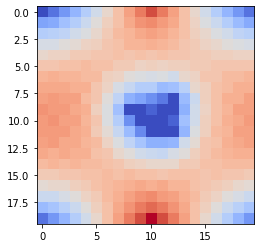

In [33]:
plt.imshow(C, cmap='coolwarm')
with open("output.txt","w") as txt_file:
  for line in C:
    txt_file.write(" ".join(map(str,line))+"\n")